In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.simplefilter(action='ignore')
from sklearn.datasets import load_boston

In [22]:
boston = load_boston()

In [23]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
## Adding the PRICE or the Target column to the dataset
bos["PRICE"] = boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
## Checking for ull values
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [33]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Text(0, 0.5, 'Frequency')

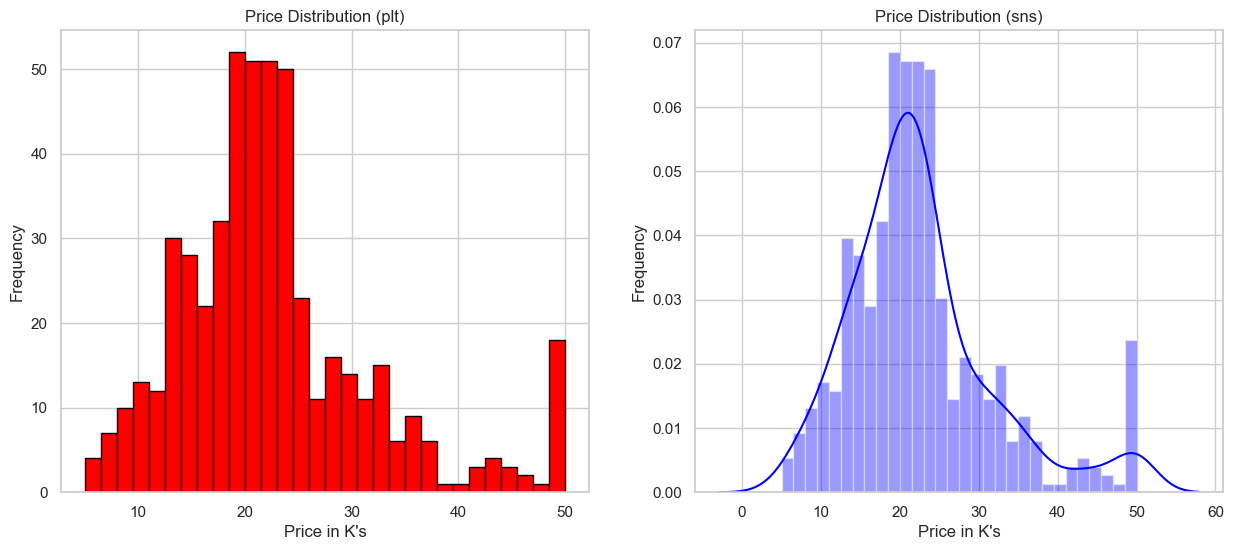

In [56]:
## Plotting the price distribution graph in matplotlib and seaborn
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(bos["PRICE"], bins=30, ec = "black", color = 'red')
plt.title("Price Distribution (plt)")
plt.xlabel("Price in K's")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(bos["PRICE"], bins=30, color='blue')
plt.title("Price Distribution (sns)")
plt.xlabel("Price in K's")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

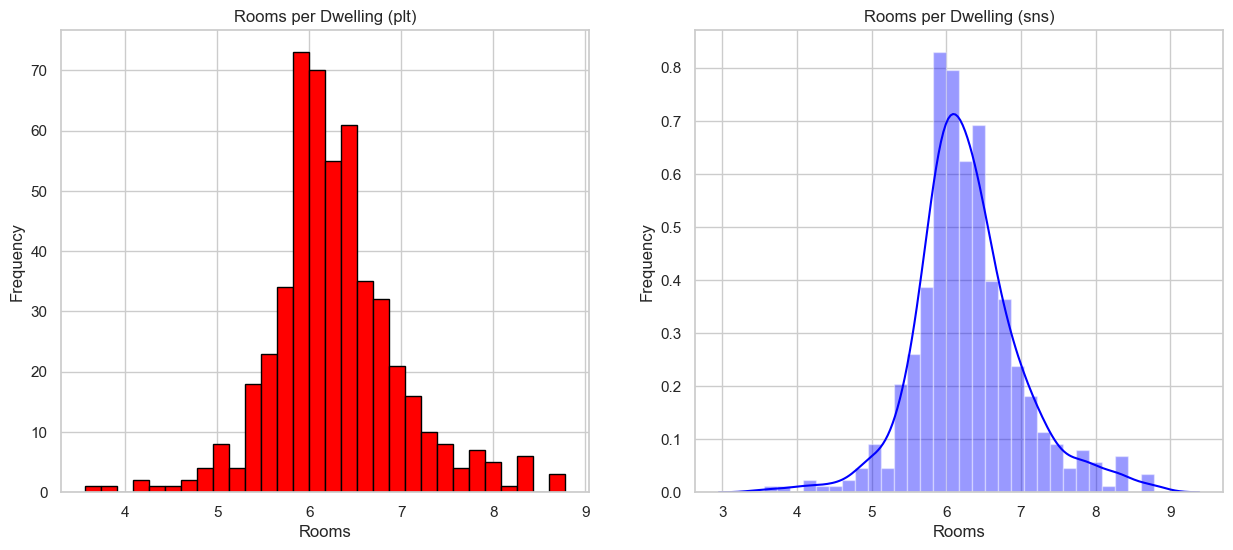

In [59]:
## Average number of rooms 
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(bos["RM"], bins=30, ec = "black", color = 'red')
plt.title("Rooms per Dwelling (plt)")
plt.xlabel("Rooms")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(bos["RM"], bins=30, color='blue')
plt.title("Rooms per Dwelling (sns)")
plt.xlabel("Rooms")
plt.ylabel("Frequency")

In [67]:
## Correlation of other variables with the target variable i.e, PRICE

bos.corr()["PRICE"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

##### In the above observation, the higher negative correlation of the price is with the LSTAT(Lower Status) variable and the positive correlation is with the RM(Number of rooms per house) 

<AxesSubplot:>

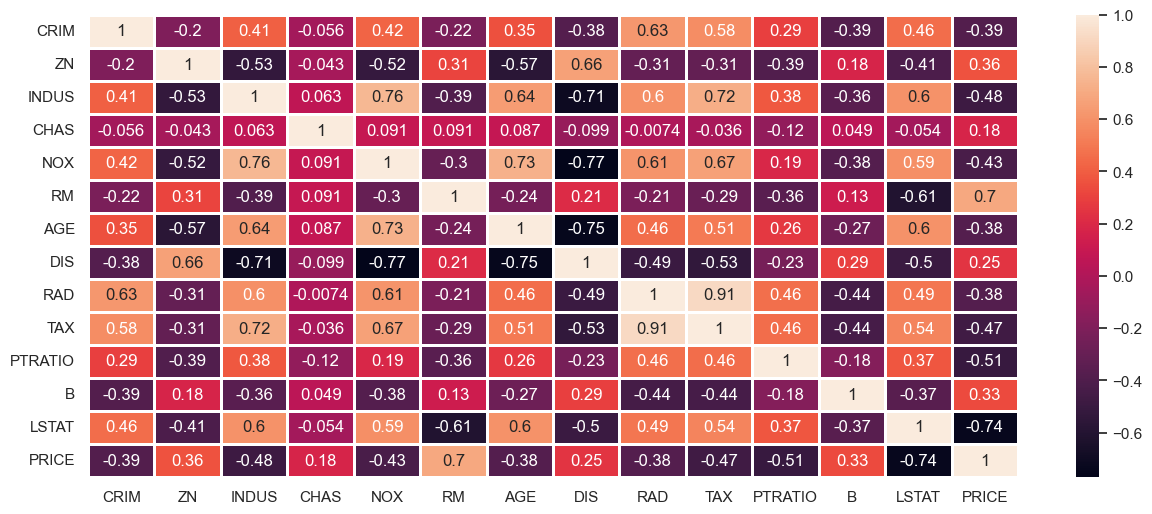

In [71]:
## For a better understanding of the correlation
corr = bos.corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr, annot=True, linewidth=1)

Text(0, 0.5, 'Price')

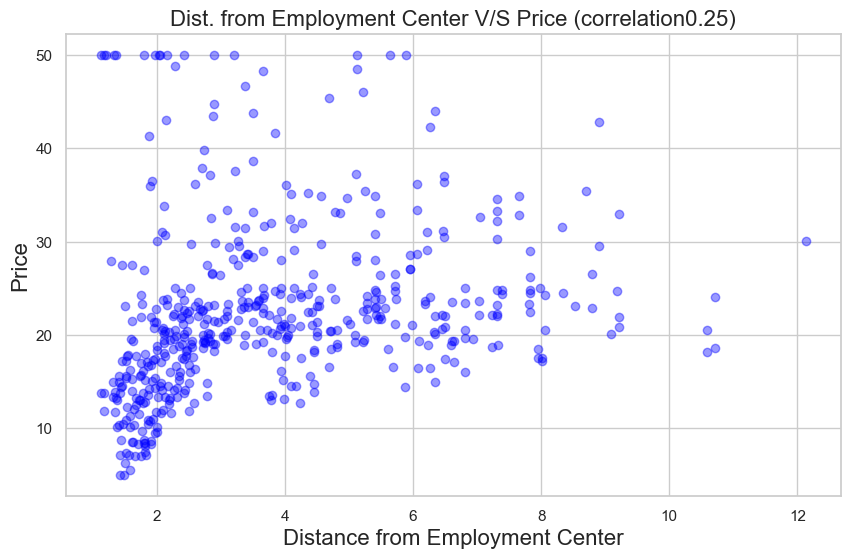

In [93]:
corr_value = round(bos.DIS.corr(bos.PRICE), 3)

plt.figure(figsize=(10,6))
plt.scatter(x = bos.DIS, y = bos.PRICE, color = 'blue', alpha=0.4)
plt.title(f"Dist. from Employment Center V/S Price (correlation{corr_value})", fontsize=16)
plt.xlabel("Distance from Employment Center", fontsize=16)
plt.ylabel("Price", fontsize=16)

In [127]:
## Splitting the data into training and testing set.

from sklearn.model_selection import train_test_split

independent = bos.drop(["PRICE"], axis=1)
target= bos["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size=0.2, random_state=42)

In [123]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [128]:
## Evaluating the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
print("The R_squared value of the Training set is", model.score(X_train, y_train))
print("The R_squared value of the Testing set is", model.score(X_test, y_test))

The R_squared value of the Training set is 0.7508856358979673
The R_squared value of the Testing set is 0.6687594935356332
